In [6]:
from scipy.ndimage import gaussian_filter
import numpy  as np
import matplotlib.pyplot as plt
import time
from utils import *
import copy
from hcipy import *
import os.path
import csv
from astropy.io import fits
from processing import *
from IPython.lib.display import Audio
%matplotlib inline

# Input the name of the CSV/Header.txt files

In [7]:
saved_file_name = "Viper_Comparison_Mag=5_Filter=V"

names = [
"ProEM_Mag_5_Band_V",
"ORCA_Quest_Mag_5_Band_V",
"Kinetix_Mag_5_Band_V",
"Prime_BSI_Mag_5_Band_V",
"iXon897_Mag_5_Band_V",

]

sigma = 5

# Import the CSV/Header.txt files

In [8]:
csv_names = []
for i in names:
    csv_names.append(i + "_Contrast_Curve_Data.csv")

header_names = []
for i in names:
    header_names.append(i + "_Header.txt")    
    
csv_arrays = []
for i in csv_names:
    csv_arrays.append(np.loadtxt(i, delimiter = ','))

header_list = []
for i in header_names:
    file_object = open(i, 'r')
    header_list.append(file_object.readlines())

# Obtain Relevant Data from Header.txt files

In [11]:
wavelengths = []
pupil_diameters = []
mags = []
qs = []
shutters = []
fpss = []
read_noises = []
dark_currents = []
seeings = []
outer_scales = []
velocitys = []
quantum_efficiencys = []
exposure_times = []
exposure_numbers = []
filter_names=[]
EM_gains = []
EM_saturates = []
full_well_depths = []
titles = []
detector_names = []
detector_types = []
for i in header_list:

    for j in i:
        if j.find("TITLE") == 0:
            start = j.find("'")
            stop = j.find("'", start+1, -1)
            titles.append(j[start+1:stop])

    for j in i:
        if j.find("WAVELNTH") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            wavelengths.append(j[start+1:stop])
    for j in i:
        if j.find("PUPDIAMT") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            pupil_diameters.append(j[start+1:stop])
    for j in i:
        if j.find("PRIMAG") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            mags.append(j[start+1:stop])
    for j in i:
        if j.find("Q") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            qs.append(j[start+1:stop])
    for j in i:
        if j.find("FPS") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            fpss.append(j[start+1:stop])
    for j in i:
        if j.find("RDNOISE") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            read_noises.append(j[start+1:stop])
    for j in i:
        if j.find("DARKCURR") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            dark_currents.append(j[start+1:stop])
    for j in i:
        if j.find("QE") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            quantum_efficiencys.append(j[start+1:stop])
    for j in i:
        if j.find("SEEING") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            seeings.append(j[start+1:stop])
    for j in i:
        if j.find("OUTSCALE") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            outer_scales.append(j[start+1:stop])
    for j in i:
        if j.find("VELOCITY") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            velocitys.append(j[start+1:stop])
    for j in i:
        if j.find("EXPOTIME") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            exposure_times.append(j[start+1:stop])
    for j in i:
        if j.find("NUMEXPOS") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            exposure_numbers.append(j[start+1:stop])
    for j in i:
        if j.find("FILTNAME") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            filter_names.append(j[start+1:stop])
    x = True
    for j in i:
        if j.find("EMGAIN") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            EM_gains.append(j[start+1:stop])
            x = False
    if x:
        EM_gains.append("")
    x = True
    for j in i:
        if j.find("EMSAT") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            EM_saturates.append(j[start+1:stop])
            x = False
    if x:
        EM_saturates.append("")
    x = True
    for j in i:
        if j.find("FULLWELL") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            full_well_depths.append(j[start+1:stop])
            x = False
    if x:
        full_well_depths.append("")
    for j in i:
        if j.find("DETNAME") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            detector_names.append(j[start+1:stop])
    for j in i:
        if j.find("DETTYPE") == 0:
            start = j.find("'")
            stop = j.find(" ", start+1, -1)
            detector_types.append(j[start+1:stop])

# Plot the CSV Files

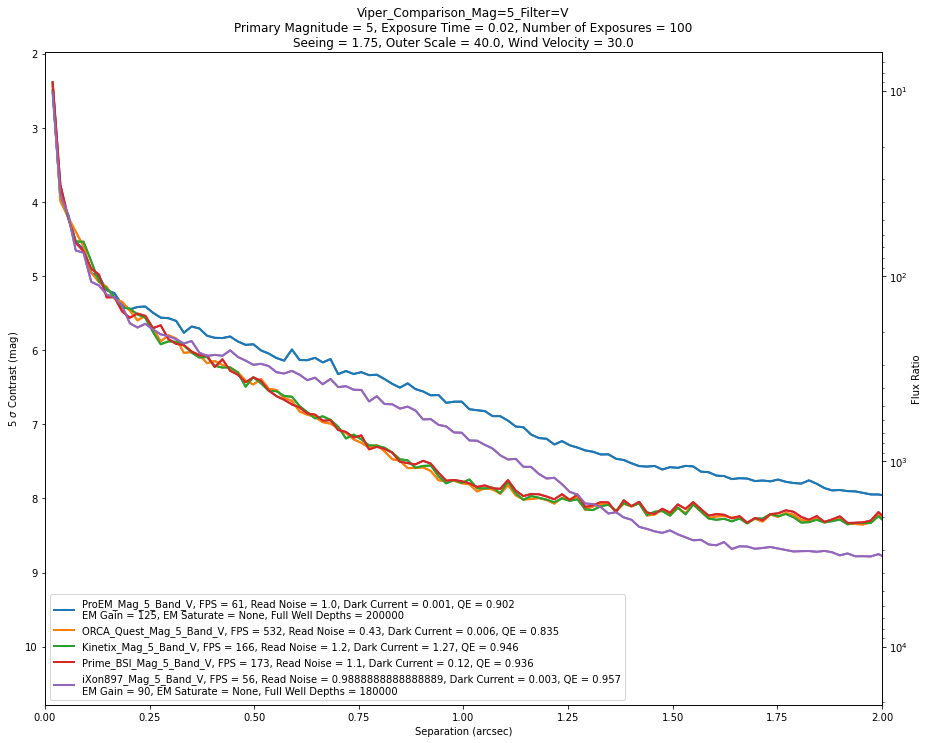

In [16]:
fig, ax1 = plt.subplots(figsize=(15,12))
for i in range(len(csv_arrays)):
    label = titles[i] + ", FPS = "+ fpss[i] + ", Read Noise = " + read_noises[i] + ", Dark Current = " + dark_currents[i] + ", QE = " + quantum_efficiencys[i]
    if EM_gains[i]:
        label = label + "\nEM Gain = " + EM_gains[i] + ", EM Saturate = " + EM_saturates[i] + ", Full Well Depths = " + full_well_depths[i]
    plt.plot(csv_arrays[i][:,0], csv_arrays[i][:,1], label = label , lw=2)
title = "\nPrimary Magnitude = " + str(mags[0]) +  ", Exposure Time = " + exposure_times[0] + ", Number of Exposures = " + exposure_numbers[0] + "\nSeeing = " + seeings[0] + ", Outer Scale = " + outer_scales[0] + ", Wind Velocity = " + velocitys[0]
plt.xlim(0.0, 2.0)
ax1.set_xlabel(r'Separation (arcsec)')
ax1.set_ylabel(r'' + str(sigma) + ' $\sigma$ Contrast (mag)')
ax1.tick_params(axis='y')
plt.gca().invert_yaxis()
plt.legend(loc='lower left')
ax2 = ax1.twinx() # second y-axis
for i in range(len(csv_arrays)):
    plt.plot(csv_arrays[i][:,0], 10**(0.4*csv_arrays[i][:,1]) , lw=2)
ax2.set_ylabel('Flux Ratio')
ax2.tick_params(axis='y')
plt.yscale("log") 
plt.gca().invert_yaxis()
plt.title(saved_file_name + title)
plt.savefig(saved_file_name + ".jpg", bbox_inches = 'tight',  dpi = 300)